In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
risk = pd.read_csv('credit_risk_dataset.csv')
risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#copying the original dataset
data = risk.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
#checking Null values
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
#unique values
for i in data.columns:
    print('Variable - ',i)
    print('Number of Unique values - ',data[i].nunique())
    print('Unique values are ',pd.unique(data[i]))
    print('\n')

Variable -  person_age
Number of Unique values -  58
Unique values are  [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]


Variable -  person_income
Number of Unique values -  4295
Unique values are  [  59000    9600   65500 ...  720000 1900000    4888]


Variable -  person_home_ownership
Number of Unique values -  4
Unique values are  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


Variable -  person_emp_length
Number of Unique values -  36
Unique values are  [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]


Variable -  loan_intent
Number of Unique values -  6
Unique values are  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


Variable -

In [6]:
#statistical parameter
data.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [7]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.loan_status)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.loan_status, ax=axes[1])

<AxesSubplot:xlabel='person_age'>

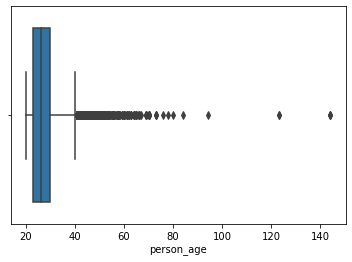

In [8]:
#EDA - Person age variable
#checking for outliers
sns.boxplot(data.person_age)

There are outliers i.e., person age is more than 110

In [9]:
#removing the outliers
data = data[data.person_age<80]
data = data.reset_index(drop=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


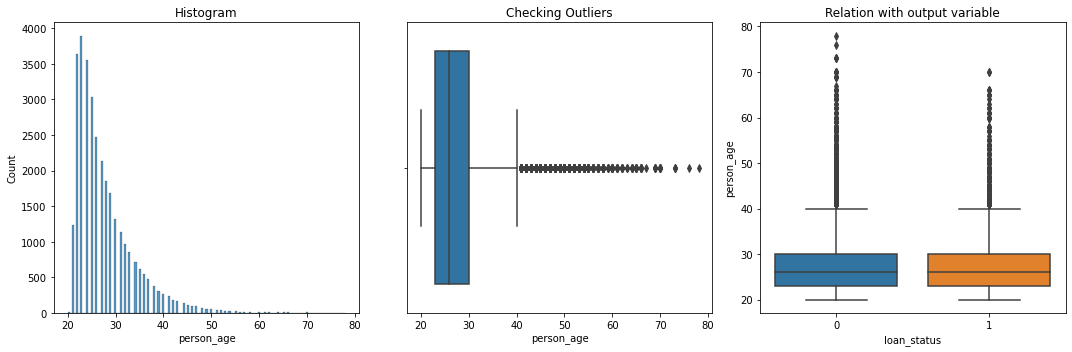

In [10]:
#EDA - Person age variable
plot_conti(data.person_age)

In [11]:
#visualization of age variable
data['age_visual'] = 0
for i in range(0,len(data)):
    if (data.person_age[i])<=25:
        data['age_visual'][i] = 'age<25'
    elif ((data.person_age[i]>25) & (data.person_age[i]<=30)):
        data['age_visual'][i] = 'age_25-30'
    elif ((data.person_age[i]>30) & (data.person_age[i]<=40)):
        data['age_visual'][i] = 'age_30-40'
    elif (data.person_age[i]>40):
        data['age_visual'][i] = 'age>40'

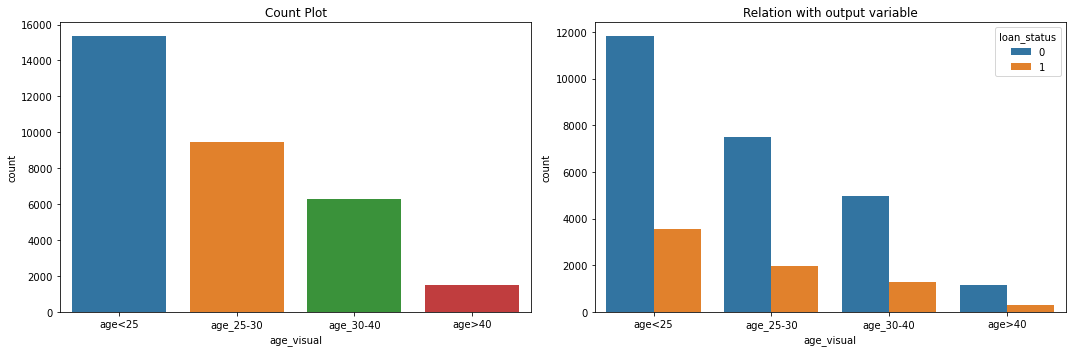

In [12]:
plot_cato(data.age_visual)

<AxesSubplot:xlabel='person_income'>

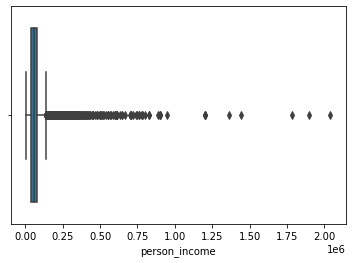

In [13]:
#EDA - person income
#checking for outliers
sns.boxplot(data.person_income)

In [14]:
#removing the outliers
data = data[data.person_income<1200000]
data = data.reset_index(drop=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_visual
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,age<25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,age<25
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,age<25
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,age<25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,age<25


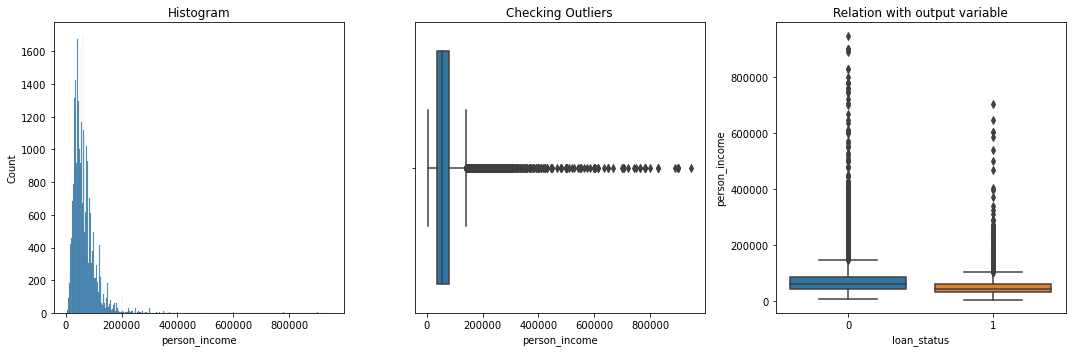

In [15]:
plot_conti(data.person_income)

<AxesSubplot:xlabel='age_visual', ylabel='person_income'>

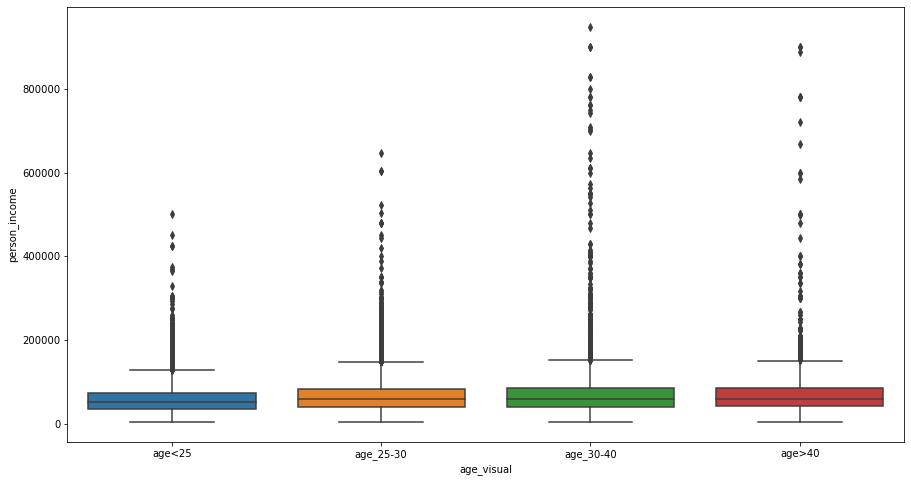

In [16]:
#checking income wrt to age
plt.figure(figsize=(15,8))
sns.boxplot(x=data.age_visual,y=data.person_income)

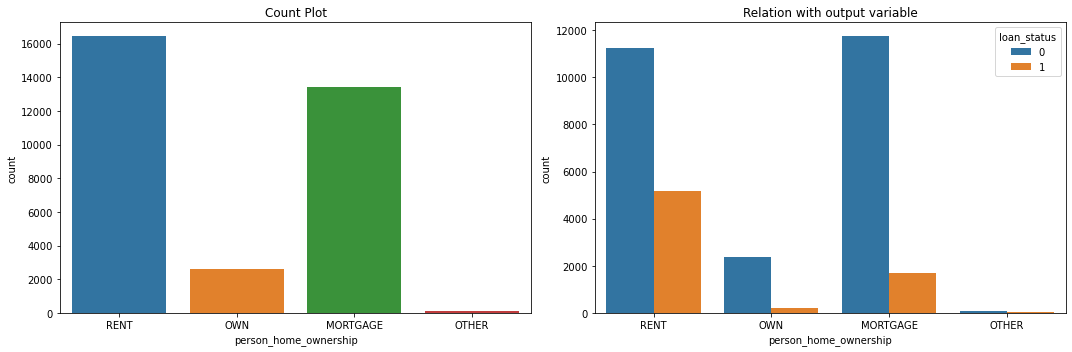

In [17]:
#EDA - person home ownership
plot_cato(data.person_home_ownership)

<AxesSubplot:xlabel='person_home_ownership', ylabel='person_income'>

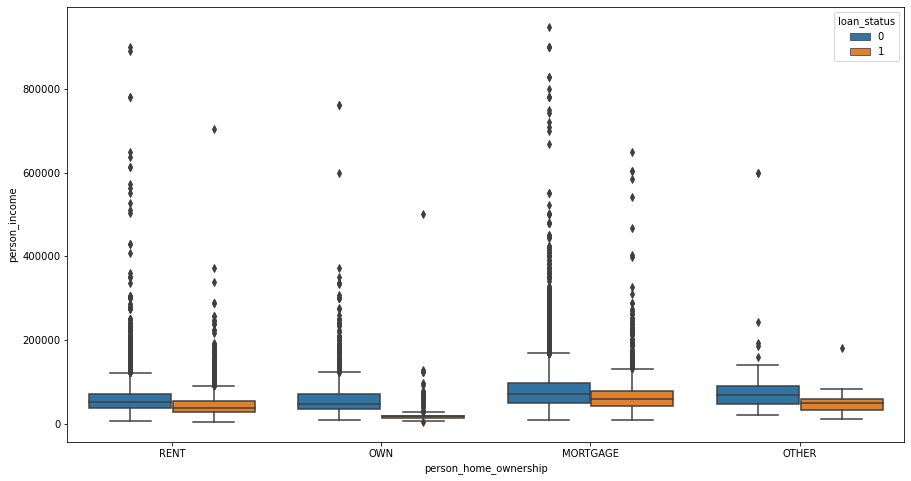

In [18]:
#plotting home ownership and income and loan status variable
plt.figure(figsize=(15,8))
sns.boxplot(x=data.person_home_ownership,y=data.person_income,hue = data.loan_status)

<AxesSubplot:xlabel='person_home_ownership', ylabel='person_age'>

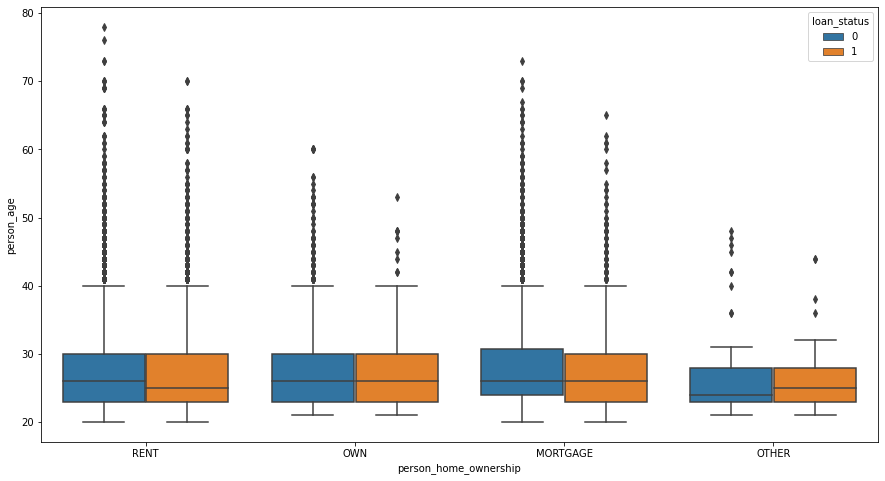

In [19]:
#plotting home ownership and age and loan status variable
plt.figure(figsize=(15,8))
sns.boxplot(x=data.person_home_ownership,y=data.person_age,hue=data.loan_status)

<AxesSubplot:xlabel='person_emp_length'>

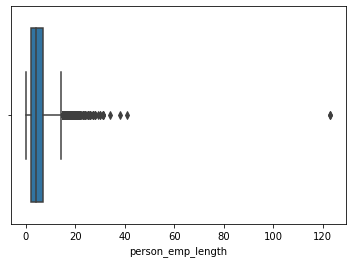

In [20]:
#EDA - employment years
#checking for outliers
sns.boxplot(data.person_emp_length)

There is one outlier which has more than 120 years of experience which is not possible. Hence this row is removed

In [21]:
#removing the outliers
data = data[data.person_emp_length<80]
data = data.reset_index(drop=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_visual
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,age<25
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,age<25
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,age<25
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,age<25
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,age<25


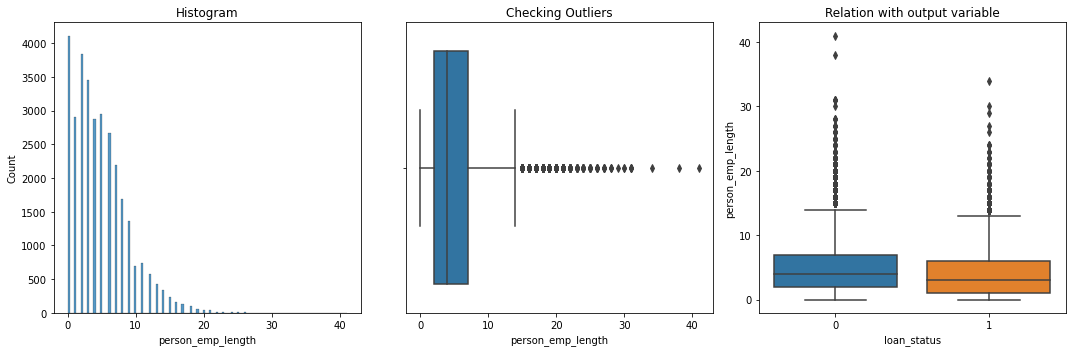

In [22]:
plot_conti(data.person_emp_length)

<AxesSubplot:xlabel='age_visual', ylabel='person_emp_length'>

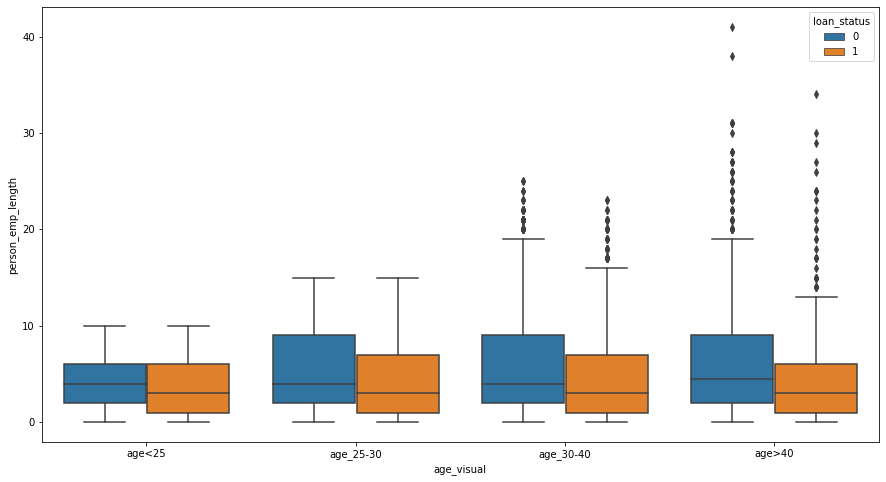

In [23]:
#plotting experience vs income with loan status variable
plt.figure(figsize=(15,8))
sns.boxplot(x=data.age_visual,y=data.person_emp_length,hue=data.loan_status)

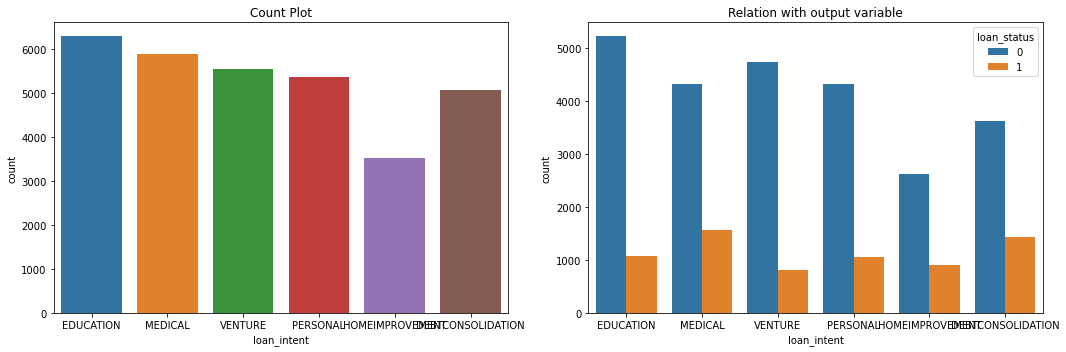

In [24]:
#EDA - loan_intent variable
plot_cato(data.loan_intent)

<AxesSubplot:xlabel='loan_intent', ylabel='person_age'>

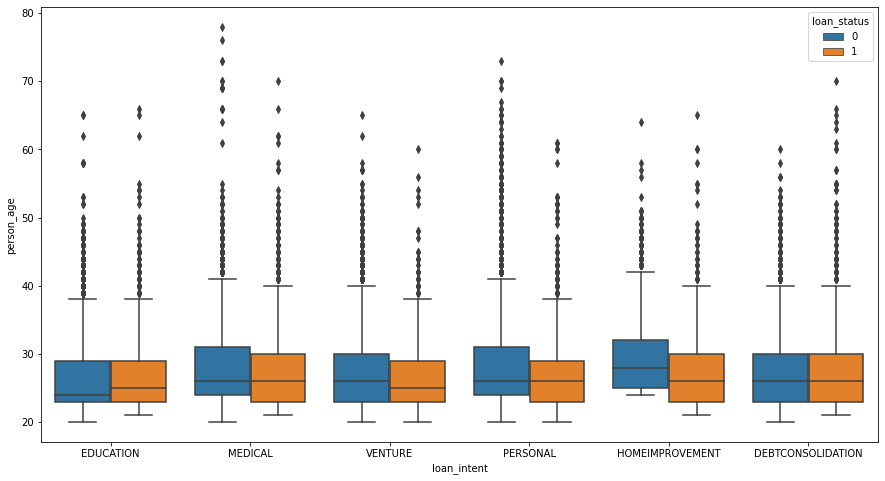

In [25]:
#plotting wrt to age and loan status
plt.figure(figsize=(15,8))
sns.boxplot(x=data.loan_intent,y=data.person_age,hue=data.loan_status)

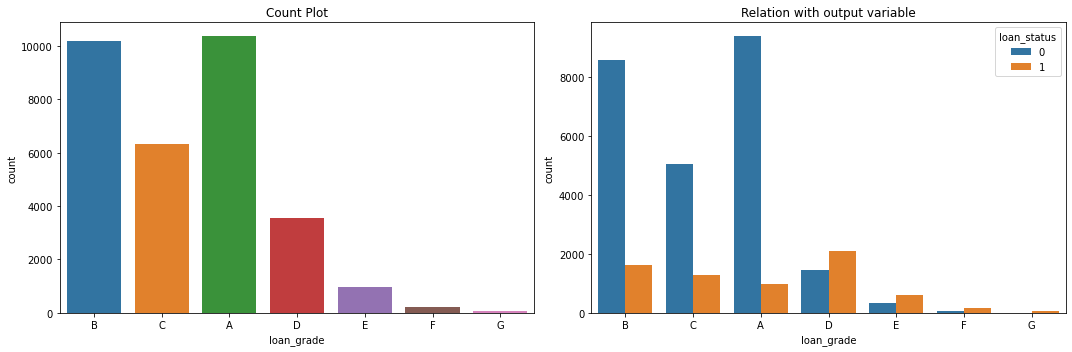

In [26]:
#EDA - loan grade variable
plot_cato(data.loan_grade)

<AxesSubplot:xlabel='loan_grade', ylabel='person_age'>

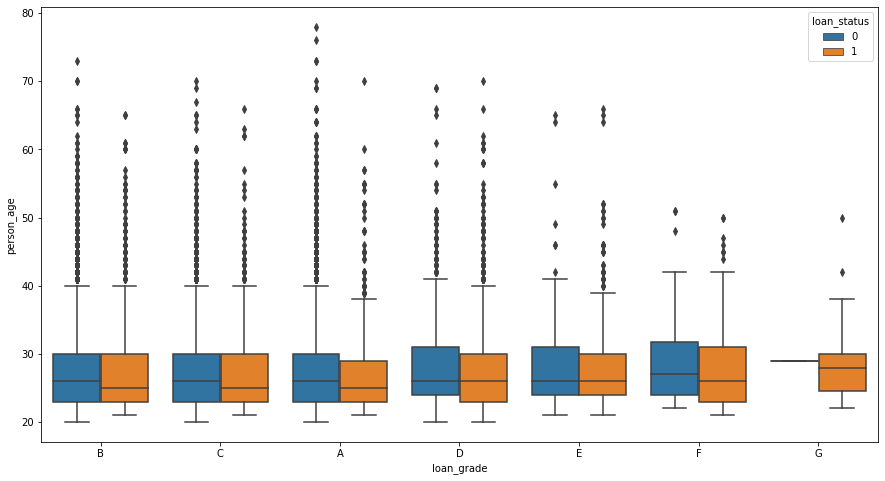

In [27]:
#plotting wrt to age and loan status
plt.figure(figsize=(15,8))
sns.boxplot(x=data.loan_grade,y=data.person_age,hue=data.loan_status)

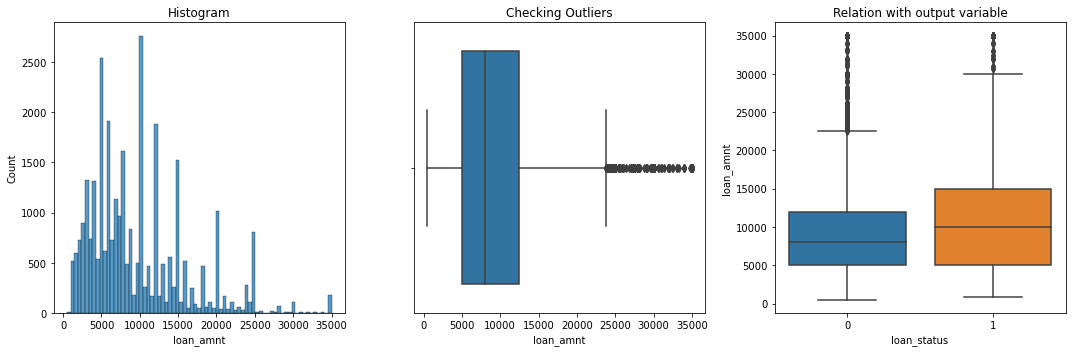

In [28]:
#EDA - loan amount
plot_conti(data.loan_amnt)

<AxesSubplot:xlabel='age_visual', ylabel='loan_amnt'>

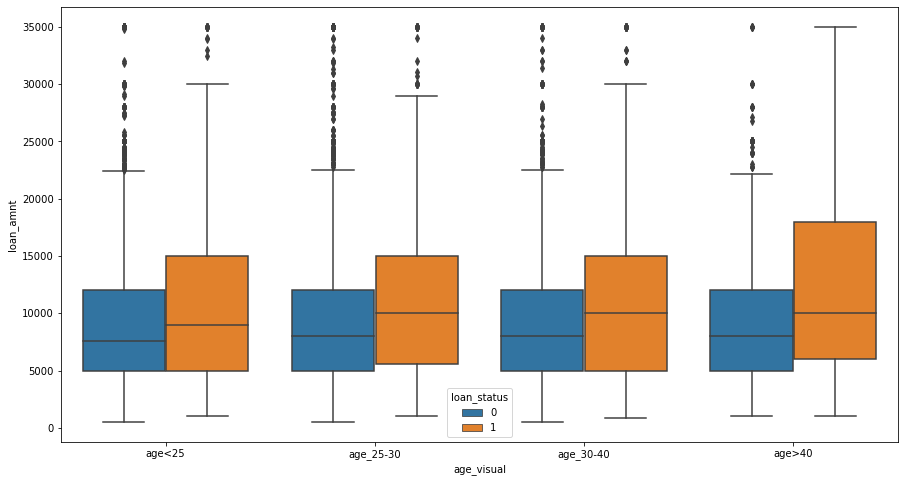

In [29]:
#plotting wrt to age group with loan status
plt.figure(figsize=(15,8))
sns.boxplot(x=data.age_visual,y=data.loan_amnt,hue=data.loan_status)

<AxesSubplot:xlabel='loan_intent', ylabel='loan_amnt'>

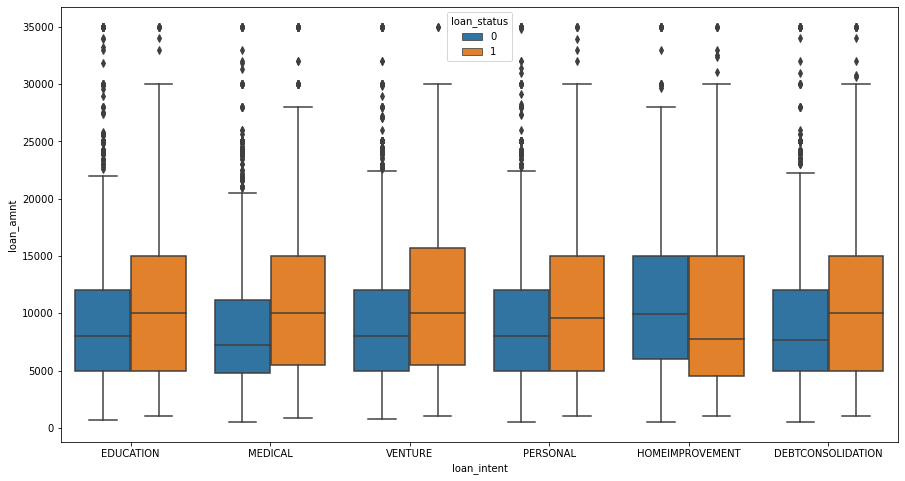

In [30]:
#plotting wrt to type of loan with loan status
plt.figure(figsize=(15,8))
sns.boxplot(x=data.loan_intent,y=data.loan_amnt,hue=data.loan_status)

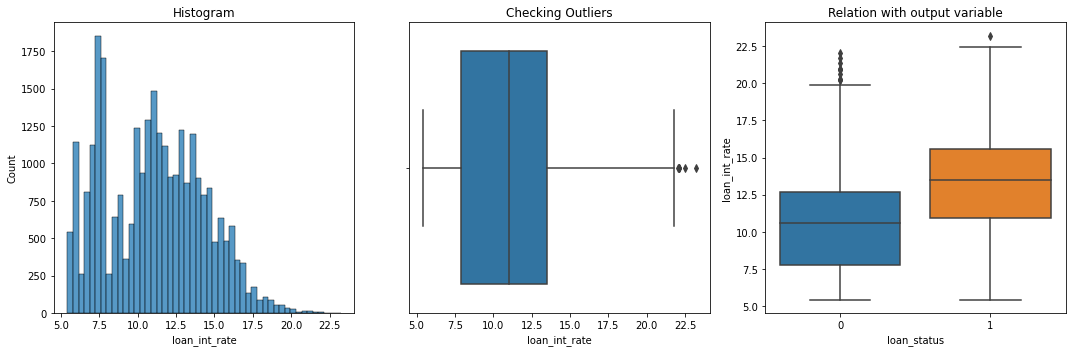

In [31]:
#EDA - Loan interest rate
plot_conti(data.loan_int_rate)

<AxesSubplot:xlabel='loan_intent', ylabel='loan_int_rate'>

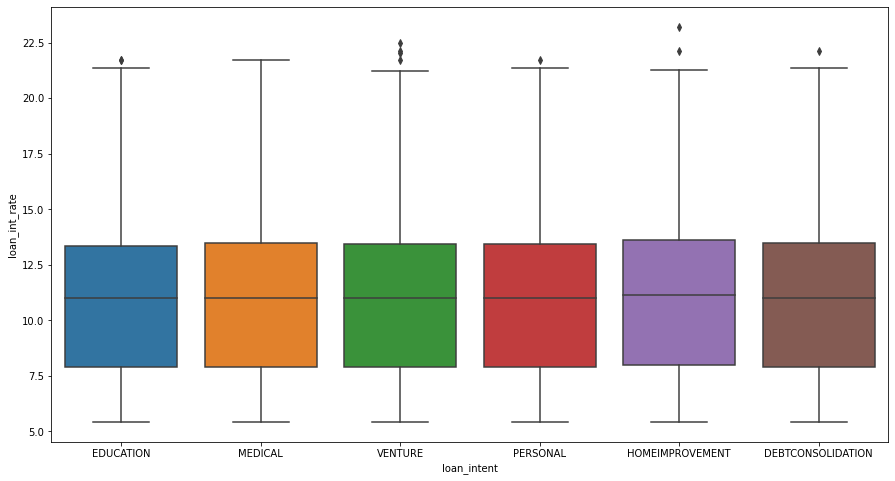

In [32]:
#plotting loan interest and type of loan
plt.figure(figsize=(15,8))
sns.boxplot(data.loan_intent,data.loan_int_rate)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

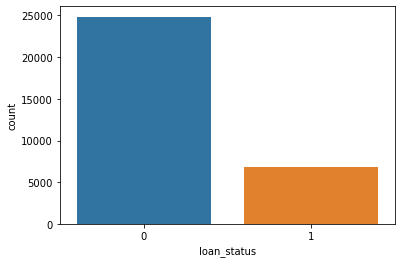

In [33]:
#EDA - loan status
sns.countplot(data.loan_status)

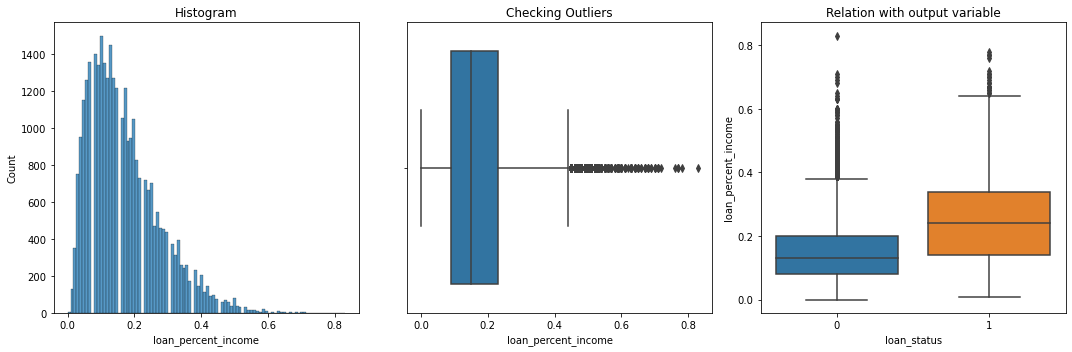

In [34]:
#EDA - loan percent income
plot_conti(data.loan_percent_income)

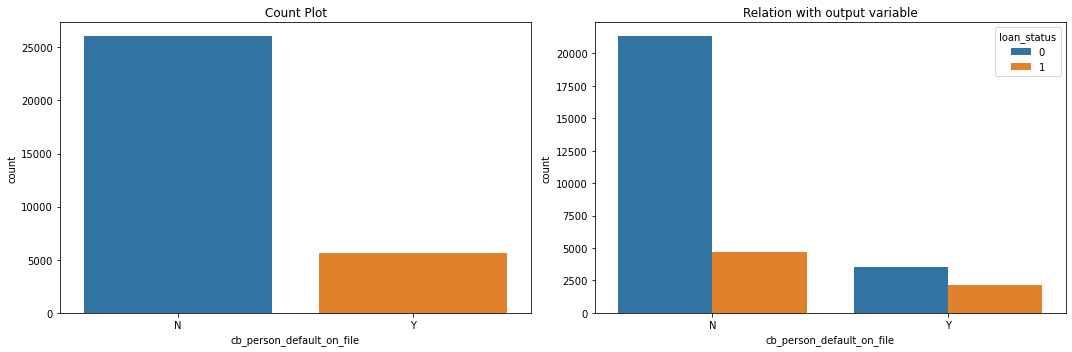

In [35]:
#EDA-cb_person_default_on_file
plot_cato(data.cb_person_default_on_file)

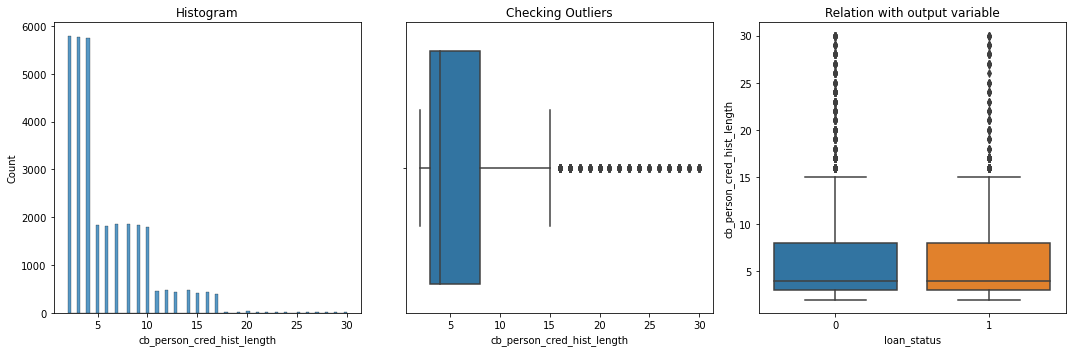

In [36]:
#EDA - cb_person_cred_hist_length
plot_conti(data.cb_person_cred_hist_length)

<AxesSubplot:>

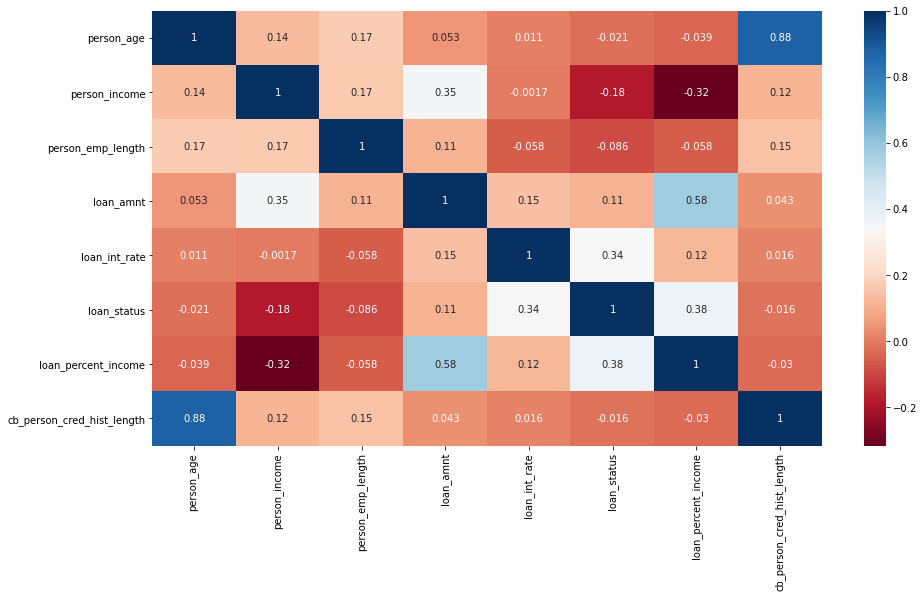

In [37]:
#creating the heatmap to show the corelation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap = 'RdBu')

From the heatmap, it is observed that few variables have high corelation between them. Those variables are removed to avoid multi-colinearity.

In [38]:
#Final dataset considered for model
data = data.drop(['cb_person_cred_hist_length','cb_person_default_on_file','loan_percent_income','age_visual'],axis=1)

In [39]:
#checking Null values
data.isna().sum()

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length           0
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3044
loan_status                 0
dtype: int64

In [40]:
#filling missing values with median
data.loan_int_rate.fillna(data.loan_int_rate.mean(),inplace=True)

In [41]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1


In [42]:
#One hot encoding using label encoder
from sklearn.preprocessing import LabelEncoder
encode_owner = LabelEncoder()

In [43]:
#encoding label for ownership
data.person_home_ownership = encode_owner.fit_transform(data.person_home_ownership)

In [44]:
#creating the dataframe
encode_ownership = pd.DataFrame(zip(encode_owner.classes_,encode_owner.transform(encode_owner.classes_)),columns=['ownership','encoded_values'])
encode_ownership.set_index('ownership',inplace=True)
encode_ownership

,encoded_values
ownership,
MORTGAGE,0
OTHER,1
OWN,2
RENT,3


In [45]:
#encoding loan intent variable
encode_intent = LabelEncoder()
data.loan_intent = encode_intent.fit_transform(data.loan_intent)

In [46]:
#creating the dataframe
encode_loan_intent = pd.DataFrame(zip(encode_intent.classes_,encode_intent.transform(encode_intent.classes_)),columns=['intent','encoded_values'])
encode_loan_intent.set_index('intent',inplace=True)
encode_loan_intent

,encoded_values
intent,
DEBTCONSOLIDATION,0
EDUCATION,1
HOMEIMPROVEMENT,2
MEDICAL,3
PERSONAL,4
VENTURE,5


In [47]:
#encoding loan grade variable
encode_grade = LabelEncoder()
data.loan_grade = encode_grade.fit_transform(data.loan_grade)

In [48]:
#creating the dataframe
encode_loan_grade = pd.DataFrame(zip(encode_grade.classes_,encode_grade.transform(encode_grade.classes_)),columns=['grade','encoded_values'])
encode_loan_grade.set_index('grade',inplace=True)
encode_loan_grade

,encoded_values
grade,
A,0
B,1
C,2
D,3
E,4
F,5
G,6


In [49]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status
0,21,9600,2,5.0,1,1,1000,11.14,0
1,25,9600,0,1.0,3,2,5500,12.87,1
2,23,65500,3,4.0,3,2,35000,15.23,1
3,24,54400,3,8.0,3,2,35000,14.27,1
4,21,9900,2,2.0,5,0,2500,7.14,1


In [50]:
#splitting the data into input and output
x = data.drop('loan_status',axis=1)
y = data.loan_status
print('Shape of input : {} and output : {}'.format(x.shape,y.shape))

Shape of input : (31668, 8) and output : (31668,)


In [51]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

In [52]:
#scaled data
x1 = MM.fit_transform(x)
x1 = pd.DataFrame(x1,columns=x.columns)
x1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate
0,0.017241,0.005932,0.666667,0.121951,0.2,0.166667,0.014493,0.321348
1,0.086207,0.005932,0.000000,0.024390,0.6,0.333333,0.144928,0.418539
2,0.051724,0.065148,1.000000,0.097561,0.6,0.333333,1.000000,0.551124
3,0.068966,0.053390,1.000000,0.195122,0.6,0.333333,1.000000,0.497191
4,0.017241,0.006250,0.666667,0.048780,1.0,0.000000,0.057971,0.096629


In [53]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {} , y_train = {} , x_test = {} , y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (25334, 8) , y_train = (25334,) , x_test = (6334, 8) , y_test = (6334,)


### Logistic regression model

In [54]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve, accuracy_score

REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      4928
           1       0.75      0.35      0.48      1406

    accuracy                           0.83      6334
   macro avg       0.80      0.66      0.69      6334
weighted avg       0.82      0.83      0.81      6334

Confusion Matrix :


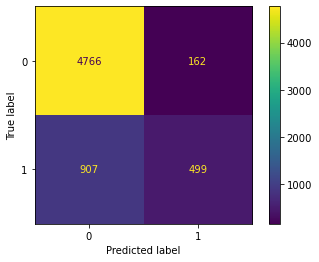

In [55]:
#initializing the model
logis = LogisticRegression()

#fitting and predicting for test data
logis_pred = logis.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,logis_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(logis,x_test,y_test)
plt.show()

#accuracy score
acc_logis = accuracy_score(y_test,logis_pred)

In [56]:
#defining function for plotting ROC curve
def plot_roc_curve(model, x_test, y_test):
    roc = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score = ',roc)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC Score =  0.8386649690103638


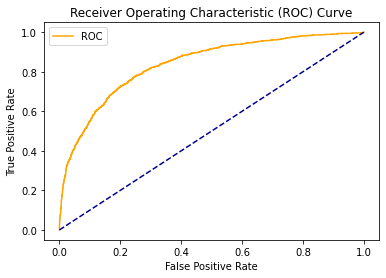

In [57]:
plot_roc_curve(logis,x_test,y_test)

### KNN model

In [58]:
#importing the libraries
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4928
           1       0.75      0.48      0.59      1406

    accuracy                           0.85      6334
   macro avg       0.81      0.72      0.75      6334
weighted avg       0.84      0.85      0.84      6334

Confusion Matrix :


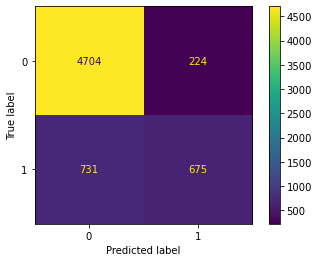



AUC Score =  0.8143452053813895


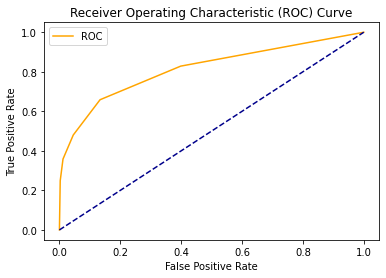

In [59]:
#fitting and predicting for test data
knn_pred = knn.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,knn_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(knn,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(knn,x_test,y_test)

#accuracy score
acc_knn = accuracy_score(y_test,knn_pred)

In [60]:
#hyper parameters using GridSearch CV
from sklearn.model_selection import GridSearchCV

In [61]:
#checking hyper parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [62]:
#parameters defining
params = {'n_neighbors':range(1,25,1)}

In [63]:
#defining grid search
grid_knn = GridSearchCV(estimator=knn, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_knn.fit(x_train,y_train)

#predicting for test data
knn_pred = grid_knn.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_knn.best_score_)
print('Best parameters : ',grid_knn.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.3min finished


Best Score :  0.859398367886428
Best parameters :  {'n_neighbors': 15}


REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      4928
           1       0.83      0.45      0.58      1406

    accuracy                           0.86      6334
   macro avg       0.84      0.71      0.75      6334
weighted avg       0.85      0.86      0.84      6334

Confusion Matrix :


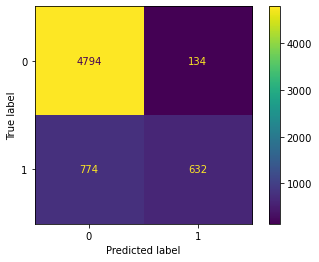



AUC Score =  0.8404193212992556


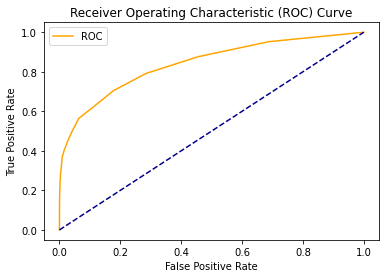

In [64]:
#Classification report
print('REPORT : \n',classification_report(y_test,knn_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_knn,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_knn,x_test,y_test)

#accuracy score
acc_knn = accuracy_score(y_test,knn_pred)

### Random Forest model

In [2]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4928
           1       0.95      0.72      0.82      1406

    accuracy                           0.93      6334
   macro avg       0.94      0.86      0.89      6334
weighted avg       0.93      0.93      0.93      6334

Confusion Matrix :


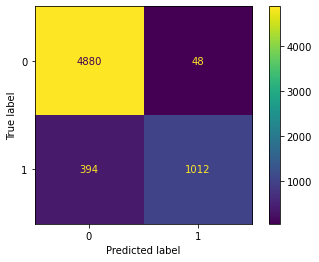



AUC Score =  0.9390656463024883


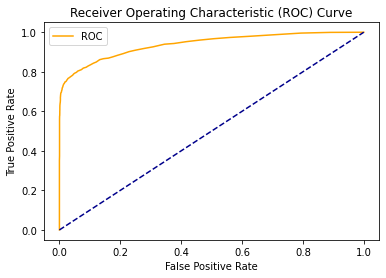

In [66]:
#fitting and predicting for test data
rand_pred = rand.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,rand_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(rand,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(rand,x_test,y_test)

#accuracy score
acc_rand = accuracy_score(y_test,rand_pred)

In [67]:
#checking hyper parameters
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
#parameters defining
params = {'n_estimators':[50,100,150],
          'max_depth':[20,30,40],
          'max_features':[5,6,7],
          'max_leaf_nodes':[20,30,40],
          'min_samples_leaf':[10,20]}

In [69]:
#defining grid search
grid_rand = GridSearchCV(estimator=rand, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_rand.fit(x_train,y_train)

#predicting for test data
rand_pred = grid_rand.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_rand.best_score_)
print('Best parameters : ',grid_rand.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  7.8min finished


Best Score :  0.9189626321362899
Best parameters :  {'max_depth': 40, 'max_features': 7, 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'n_estimators': 50}


REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4928
           1       0.95      0.67      0.79      1406

    accuracy                           0.92      6334
   macro avg       0.93      0.83      0.87      6334
weighted avg       0.92      0.92      0.91      6334

Confusion Matrix :


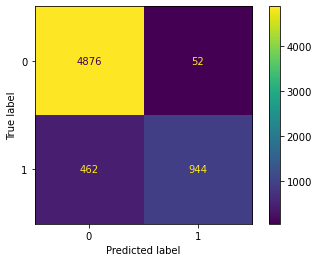



AUC Score =  0.9140412841070735


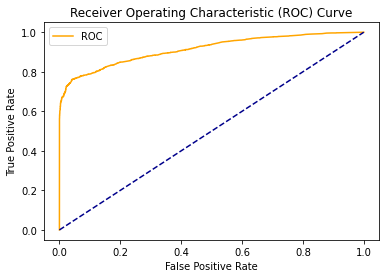

In [70]:
#Classification report
print('REPORT : \n',classification_report(y_test,rand_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_rand,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_rand,x_test,y_test)

### Naive Bayes model

In [71]:
#importing the libraries
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

REPORT : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4928
           1       0.00      0.00      0.00      1406

    accuracy                           0.78      6334
   macro avg       0.39      0.50      0.44      6334
weighted avg       0.61      0.78      0.68      6334

Confusion Matrix :


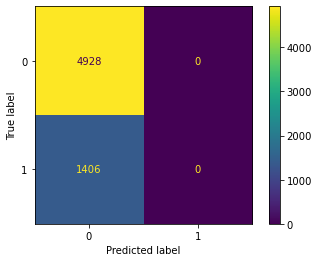



AUC Score =  0.7567185104191683


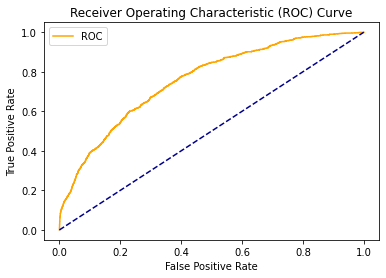

In [72]:
#fitting and predicting for test data
nb_pred = nb.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,nb_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(nb,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(nb,x_test,y_test)

#accuracy score
acc_nb = accuracy_score(y_test,nb_pred)

### SVM model

In [73]:
#importing the libraries
from sklearn.svm import SVC
svm = SVC()

REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      4928
           1       0.86      0.43      0.57      1406

    accuracy                           0.86      6334
   macro avg       0.86      0.70      0.74      6334
weighted avg       0.86      0.86      0.84      6334

Confusion Matrix :


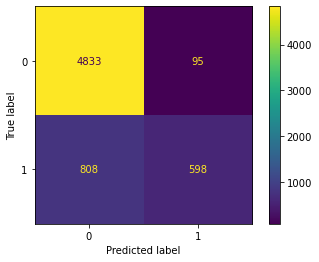

In [74]:
#fitting and predicting for test data
svm_pred = svm.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,svm_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(svm,x_test,y_test)
plt.show()
print('\n')

#accuracy score
acc_svm = accuracy_score(y_test,svm_pred)

AUC Score =  0.7030212297482035


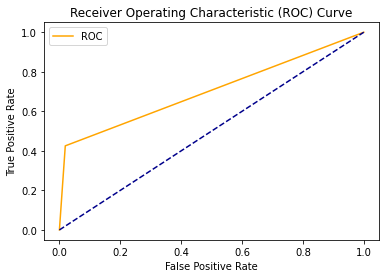

In [75]:
#plotting ROC curve
roc = roc_auc_score(y_test,svm.predict(x_test))
print('AUC Score = ',roc)
fpr, tpr, thresholds = roc_curve(y_test, svm.predict(x_test))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Adaboost

In [76]:
#importing libraries
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4928
           1       0.79      0.50      0.61      1406

    accuracy                           0.86      6334
   macro avg       0.83      0.73      0.76      6334
weighted avg       0.85      0.86      0.85      6334

Confusion Matrix :


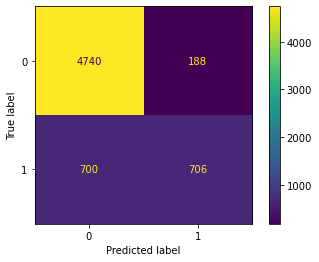



AUC Score =  0.8898488158356581


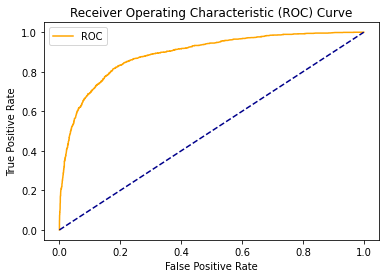

In [77]:
#fitting and predicting for test data
ada_pred = ada.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,ada_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(ada,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(ada,x_test,y_test)

#accuracy score
acc_ada = accuracy_score(y_test,ada_pred)

In [78]:
#Hyper-parameters
ada.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [79]:
#parameters defining
params = {'n_estimators':[20,50,100,150],
          'learning_rate':[0.01,0.1,1]}

In [80]:
#defining grid search
grid_ada = GridSearchCV(estimator=ada, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_ada.fit(x_train,y_train)

#predicting for test data
ada_pred = grid_ada.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_ada.best_score_)
print('Best parameters : ',grid_ada.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   23.2s finished


Best Score :  0.8590827207227978
Best parameters :  {'learning_rate': 1, 'n_estimators': 150}


REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      4928
           1       0.79      0.51      0.62      1406

    accuracy                           0.86      6334
   macro avg       0.83      0.74      0.77      6334
weighted avg       0.86      0.86      0.85      6334

Confusion Matrix :


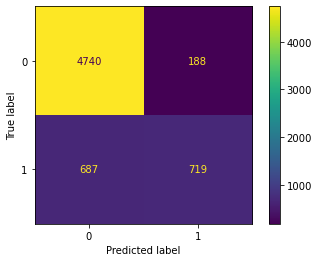



AUC Score =  0.8945893411353938


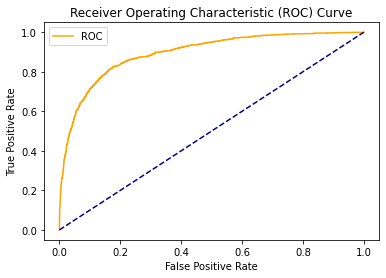

In [81]:
#Classification report
print('REPORT : \n',classification_report(y_test,ada_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_ada,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_ada,x_test,y_test)

#accuracy score
acc_ada = accuracy_score(y_test,ada_pred)

### Decision Tree model

In [82]:
#importing the libraries
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4928
           1       0.75      0.76      0.76      1406

    accuracy                           0.89      6334
   macro avg       0.84      0.84      0.84      6334
weighted avg       0.89      0.89      0.89      6334

Confusion Matrix :


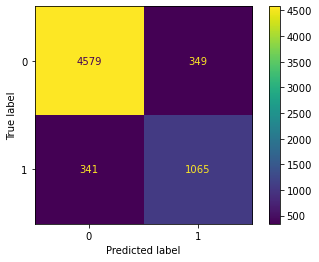



AUC Score =  0.8433240945576472


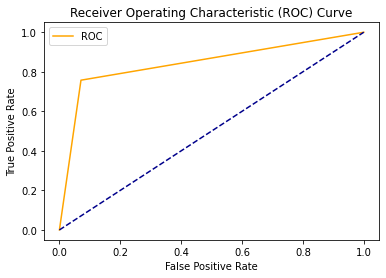

In [83]:
#fitting and predicting for test data
dt_pred = dt.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,dt_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(dt,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(dt,x_test,y_test)

#accuracy score
acc_dt = accuracy_score(y_test,dt_pred)

In [84]:
#Hyper-parameters
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [85]:
#parameters defining
params = {'max_depth':[20,30,40],
          'max_features':[5,6,7,8],
          'max_leaf_nodes':[20,30,40,50],
          'min_samples_leaf':[10,20,30]}

In [86]:
#defining grid search
grid_dt = GridSearchCV(estimator=dt, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_dt.fit(x_train,y_train)

#predicting for test data
dt_pred = grid_dt.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_dt.best_score_)
print('Best parameters : ',grid_dt.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   13.4s finished


Best Score :  0.9190021546427095
Best parameters :  {'max_depth': 20, 'max_features': 8, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4928
           1       0.95      0.69      0.80      1406

    accuracy                           0.92      6334
   macro avg       0.93      0.84      0.87      6334
weighted avg       0.92      0.92      0.92      6334

Confusion Matrix :


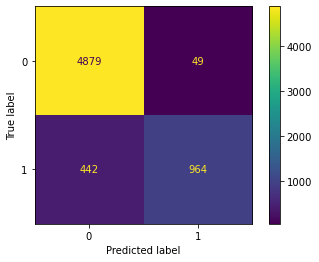



AUC Score =  0.8972434926382297


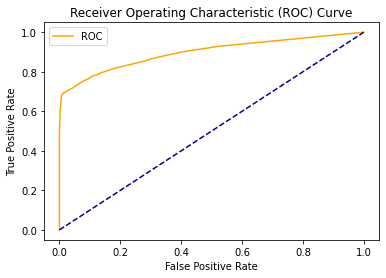

In [87]:
#Classification report
print('REPORT : \n',classification_report(y_test,dt_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_dt,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_dt,x_test,y_test)

#accuracy score
acc_dt = accuracy_score(y_test,dt_pred)

### XGBoost

In [88]:
#importing libraries
from xgboost import XGBClassifier
xgb = XGBClassifier()

[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4928
           1       0.95      0.75      0.84      1406

    accuracy                           0.94      6334
   macro avg       0.94      0.87      0.90      6334
weighted avg       0.94      0.94      0.93      6334

Confusion Matrix :


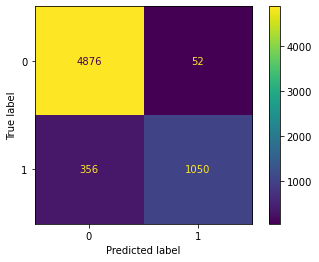



AUC Score =  0.9514350891817996


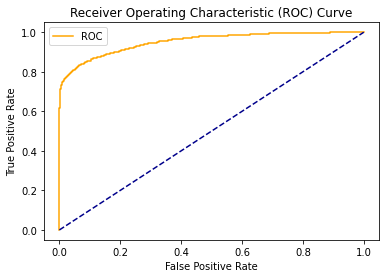

In [89]:
#fitting and predicting for test data
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,xgb_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(xgb,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(xgb,x_test,y_test)

#accuracy score
acc_xgb = accuracy_score(y_test,xgb_pred)

In [90]:
#hyper-parameters
xgb.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [91]:
xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [92]:
#parameters defining
params = {'max_depth':[20,30,40],
          'gamma':[0.01,0.1,0.2],
          'learning_rate':[0.1,0.2,0.25,0.3],
          'n_estimators':[50,100,150,200]}

In [93]:
#defining grid search
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_xgb.fit(x_train,y_train)

#predicting for test data
xgb_pred = grid_xgb.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_xgb.best_score_)
print('Best parameters : ',grid_xgb.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 24.4min finished


[20:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score :  0.93108074679447
Best parameters :  {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100}


REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4928
           1       0.94      0.75      0.84      1406

    accuracy                           0.93      6334
   macro avg       0.94      0.87      0.90      6334
weighted avg       0.94      0.93      0.93      6334

Confusion Matrix :


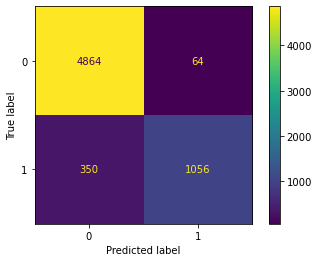



AUC Score =  0.9461197142118195


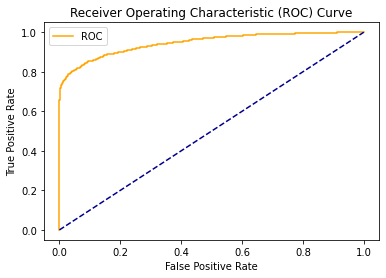

In [94]:
#Classification report
print('REPORT : \n',classification_report(y_test,xgb_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_xgb,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_xgb,x_test,y_test)

#accuracy score
acc_xgb = accuracy_score(y_test,xgb_pred)

### Gradient Boosting model

In [95]:
#importing libraries
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      4928
           1       0.92      0.68      0.78      1406

    accuracy                           0.92      6334
   macro avg       0.92      0.83      0.87      6334
weighted avg       0.92      0.92      0.91      6334

Confusion Matrix :


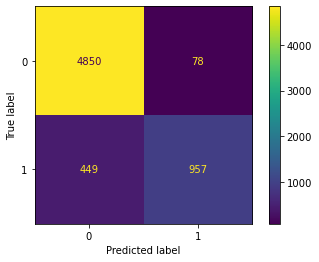



AUC Score =  0.9291003104736657


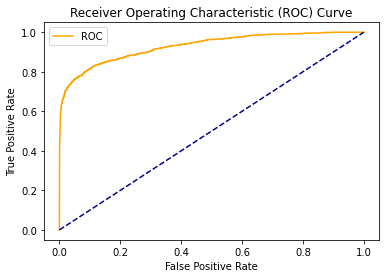

In [96]:
#fitting and predicting for test data
gb_pred = gb.fit(x_train, y_train).predict(x_test)

#Classification report
print('REPORT : \n',classification_report(y_test,gb_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(gb,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(gb,x_test,y_test)

#accuracy score
acc_gb = accuracy_score(y_test,gb_pred)

In [97]:
#Hyper-parameters
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [98]:
#parameters defining
params = {'max_depth':[30,40],
          'max_features':[4,5,6],
          'learning_rate':[0.1,0.2,0.3],
          'n_estimators':[50,150]}

In [99]:
#defining grid search
grid_gb = GridSearchCV(estimator=gb, param_grid=params, verbose=1, cv=3, n_jobs=-1)

#fitting the grid search with training data
grid_gb.fit(x_train,y_train)

#predicting for test data
gb_pred = grid_gb.predict(x_test)

#printing grid parameters
print('Best Score : ',grid_gb.best_score_)
print('Best parameters : ',grid_gb.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 25.1min finished


Best Score :  0.9276465892334055
Best parameters :  {'learning_rate': 0.3, 'max_depth': 30, 'max_features': 4, 'n_estimators': 150}


REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4928
           1       0.96      0.73      0.83      1406

    accuracy                           0.93      6334
   macro avg       0.95      0.86      0.89      6334
weighted avg       0.94      0.93      0.93      6334

Confusion Matrix :


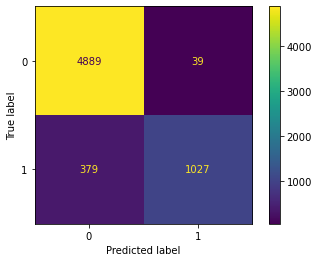



AUC Score =  0.9377510547329626


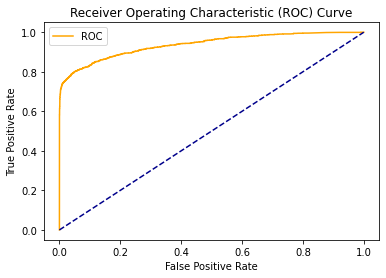

In [100]:
#Classification report
print('REPORT : \n',classification_report(y_test,gb_pred))

#plotting the confusion matrix
print('Confusion Matrix :')
plot_confusion_matrix(grid_gb,x_test,y_test)
plt.show()
print('\n')

#plotting ROC curve
plot_roc_curve(grid_gb,x_test,y_test)

#accuracy score
acc_gb = accuracy_score(y_test,gb_pred)

### Consolidating the results

In [101]:
model_name = ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','Adaboost','Gradient Boosting','XGBoost']
accuracy = [acc_logis,acc_knn,acc_svm,acc_nb,acc_dt,acc_rand,acc_ada,acc_gb,acc_xgb]
result = pd.DataFrame({'Accuracy':accuracy},index=model_name)
result

,Accuracy
Logistic Regression,0.831228
KNN,0.856647
SVM,0.857436
Naive Bayes,0.778023
Decision Tree,0.922482
Random Forest,0.930218
Adaboost,0.861857
Gradient Boosting,0.934007
XGBoost,0.934638


In [102]:
#result.to_excel('accuracy score.xlsx')

XGBoost has highest accuracy of 94% as well as AUC score of 0.95

In [103]:
#creating Final model
model = XGBClassifier()

model.fit(x_train,y_train)

[21:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
#Exporting pickle files
import pickle

In [105]:
model_out = open('model.pkl','wb')
pickle.dump(model,model_out)
model_out.close()

In [106]:
#checking for sample data
x = [0.017241,0.005932,0.666667,0.121951,0.2,0.166667,0.014493,0.321348]
a = pd.DataFrame(columns=['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate'])
a.loc[0] = x
print(a)

model.predict(a)

   person_age  person_income  person_home_ownership  person_emp_length  \
0    0.017241       0.005932               0.666667           0.121951   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  
0          0.2    0.166667   0.014493       0.321348  


array([0], dtype=int64)

In [107]:
#pickling the minmax scalar
pickle_out = open('scalar.pkl','wb')
pickle.dump(MM,pickle_out)
pickle_out.close()

In [108]:
#example
z = np.array([[21,9600,2,5.0,1,1,1000,11.14]])
o = MM.transform(z)
sc = pd.DataFrame(o,columns=['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate'])
sc

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate
0,0.017241,0.005932,0.666667,0.121951,0.2,0.166667,0.014493,0.321348


In [109]:
#pickling label encoder for ownership, loan intent and grade
pickle.dump(encode_owner,open('owner.pkl','wb'))

pickle.dump(encode_intent,open('intent.pkl','wb'))

pickle.dump(encode_grade,open('grade.pkl','wb'))

In [110]:
encode_grade.transform(['G'])

array([6], dtype=int64)

In [111]:
encode_owner.transform(['OWN'])

array([2], dtype=int64)

In [112]:
encode_intent.transform(['EDUCATION'])

array([1], dtype=int64)

In [113]:
#Example
age = '40'; income = '25000'; owner = 'RENT'; exp = '4'; intent = 'EDUCATION'; grade = 'A'; amt = '30000'; rate = '11'

#encoding
owner = encode_owner.transform([owner])
intent = encode_intent.transform([intent])
grade = encode_grade.transform([grade])

#min max scalar
input = np.array([age,income,int(owner),exp,int(intent),int(grade),amt,rate])

scaled = MM.transform([input])

#predicting
sc = pd.DataFrame(scaled,columns=['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate'])

model.predict(sc)

array([1], dtype=int64)